In [15]:
import pandas as pd


In [17]:
data = pd.read_csv("Agri - Sheet1.csv")

In [19]:
print(data.head())

           Name  Agri_type        phone     Address  Age fertilizer usage  \
0     Ali Hassa  vegitable  25261000000      Afgoye   40     non chemical   
1     Hawo Abdi     Banana  25261574580         bay   50     non chemical   
2   Geele Farah      Mango  25262149160    beydhabo   25     non chemical   
3  Ahmed Husein     Banana  25262723740  garbaharey   34     non chemical   
4  Mahmoud Abdi       Rice  25263298320   buuhoodle   52     non chemical   

  soil type  
0      clay  
1      clay  
2      clay  
3     sandy  
4      clay  


In [21]:
print(data.isnull().sum())

Name                0
Agri_type           0
phone               0
Address             0
Age                 0
fertilizer usage    0
soil type           0
dtype: int64


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


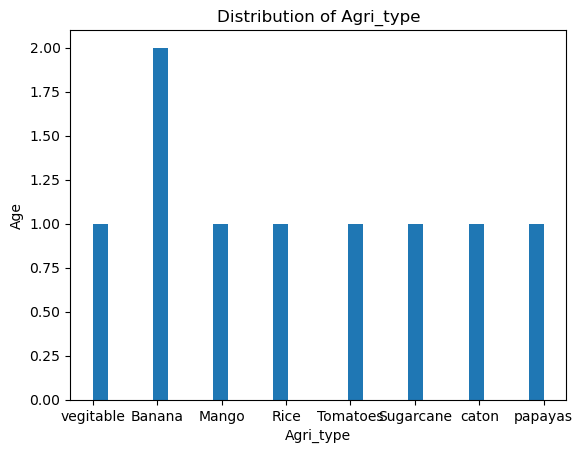

In [25]:
plt.hist(data['Agri_type'], bins=30)
plt.xlabel('Agri_type')
plt.ylabel('Age')
plt.title('Distribution of Agri_type')
plt.show()


In [29]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Ali Hassa'

In [31]:
#checking for missing values
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              9 non-null      object
 1   Agri_type         9 non-null      object
 2   phone             9 non-null      int64 
 3   Address           9 non-null      object
 4   Age               9 non-null      int64 
 5   fertilizer usage  9 non-null      object
 6   soil type         9 non-null      object
dtypes: int64(2), object(5)
memory usage: 636.0+ bytes
None


In [33]:
#numerical columns
print(data.describe())


              phone        Age
count  9.000000e+00   9.000000
mean   2.526330e+10  39.777778
std    1.573552e+06   8.212457
min    2.526100e+10  25.000000
25%    2.526215e+10  35.000000
50%    2.526330e+10  40.000000
75%    2.526445e+10  43.000000
max    2.526560e+10  52.000000


In [37]:
data = data.dropna()

In [39]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median'
data['Agri_type'] = imputer.fit_transform(data[['Age']])


       Agri_type         phone        Age
count   9.000000  9.000000e+00   9.000000
mean   39.777778  2.526330e+10  39.777778
std     8.212457  1.573552e+06   8.212457
min    25.000000  2.526100e+10  25.000000
25%    35.000000  2.526215e+10  35.000000
50%    40.000000  2.526330e+10  40.000000
75%    43.000000  2.526445e+10  43.000000
max    52.000000  2.526560e+10  52.000000
Agri_type
40.0    2
50.0    1
25.0    1
34.0    1
52.0    1
39.0    1
43.0    1
35.0    1
Name: count, dtype: int64
soil type
clay     5
sandy    2
silty    2
Name: count, dtype: int64


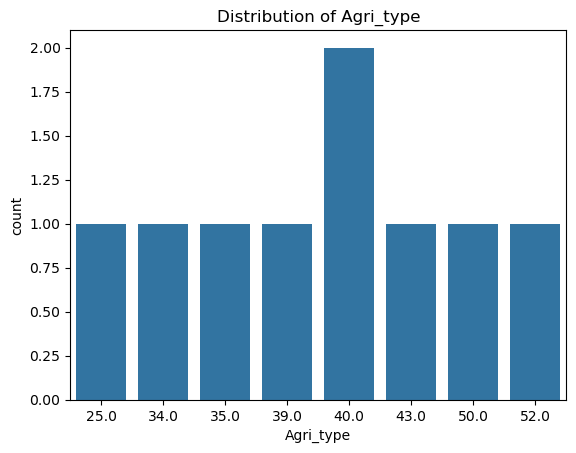

ValueError: Could not interpret value `soil_type` for `hue`. An entry with this name does not appear in `data`.

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# statistics for numerical columns
print(data.describe())

# Value counts for categorical columns
print(data['Agri_type'].value_counts())
print(data['soil type'].value_counts())

# Distribution of target variable
sns.countplot(x='Agri_type', data=data)
plt.title('Distribution of Agri_type')
plt.show()

# Relationship between Agri_type and soil type (if soil type is categorical)
sns.countplot(x='Agri_type', hue='soil_type', data=data)
plt.title('Agri_type vs Soil Type')
plt.show()

# Box plots for numerical variables (age, fertilizer usage)
sns.boxplot(x='Agri_type', y='age', data=data)
plt.title('Age Distribution by Agri_type')
plt.show()

# Correlation matrix (if you have multiple numerical features)
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


In [41]:
pd.crosstab(data['Agri_type'], data['soil type'])


soil type,clay,sandy,silty
Agri_type,,,
25.0,1,0,0
34.0,0,1,0
35.0,1,0,0
39.0,0,0,1
40.0,1,0,1
43.0,0,1,0
50.0,1,0,0
52.0,1,0,0


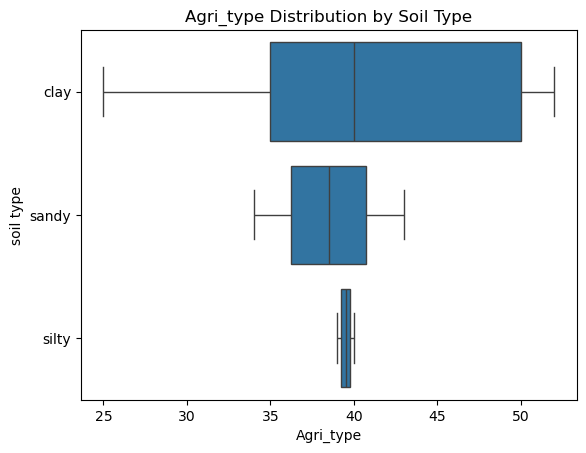

In [51]:
sns.boxplot(x='Agri_type', y='soil type', data=data)
plt.title('Agri_type Distribution by Soil Type')
plt.show()


In [99]:
from sklearn.model_selection import train_test_split


In [103]:
from sklearn.model_selection import train_test_split

X = data.drop('Agri_type', axis=1)  # Features
y = data['Agri_type']  # Target variable

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [105]:
print(X.dtypes)


Name                object
phone                int64
Address             object
Age                  int64
fertilizer usage    object
soil type           object
dtype: object


In [107]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['Age'] = le.fit_transform(X['Age'])


In [109]:
X = pd.get_dummies(X, columns=['Age'])


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


ValueError: could not convert string to float: 'Asho Bashir'

In [109]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

# Example of Randomized Search
param_dist = {
    #'n_estimators': randint(6, 8),
}
best_model = random_search.best_estimator_


AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [105]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


NameError: name 'best_model' is not defined

In [115]:
!pip install torch
!pip install transformers
#from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments, AutoTokenizer

In [135]:
!pip install transformers AutoTokenizer

ERROR: Could not find a version that satisfies the requirement AutoTokenizer (from versions: none)
ERROR: No matching distribution found for AutoTokenizer


In [139]:
from transformers import pipeline

OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\ruwei\anaconda3\Lib\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.

In [141]:
import torch
from transformers import tokenizers

# Load a pre-trained model
model_name = "bert-base-uncased"
model = tokenizers.from_pretrained(model_name, num_labels=2)  # Adjust num_labels

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Preprocess your data
# ...




OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\ruwei\anaconda3\Lib\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.

In [127]:
# Fine-tune the model
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    num_train_epochs=3,
    weight_decay=0.01
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset
)

trainer.train()



NameError: name 'TrainingArguments' is not defined

In [129]:
# Evaluate the model
results = trainer.evaluate()
print(results)

NameError: name 'trainer' is not defined

In [97]:
import pandas as pd
import numpy as np
#from transformers import AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer
import torch
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\ruwei\anaconda3\Lib\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.